## Learning Visualization

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def load_results(file_name):
    df = pd.read_csv(file_name, names=["epoch",
                                       "loss",
                                       "train_micro",
                                       "train_macro",
                                       "train_auc",
                                       "test_micro",
                                       "test_macro",
                                       "test_auc"])
    return df

In [3]:
def avg_folds(df):
    new_df = df[["epoch"]]
    new_df["avg_loss"] = df.epoch.map(df.groupby(["epoch"]).loss.mean())
    new_df["avg_train_micro"] = df.epoch.map(df.groupby(["epoch"]).train_micro.mean())
    new_df["avg_train_macro"] = df.epoch.map(df.groupby(["epoch"]).train_macro.mean())
    new_df["avg_train_auc"] = df.epoch.map(df.groupby(["epoch"]).train_auc.mean())
    new_df["avg_test_micro"] = df.epoch.map(df.groupby(["epoch"]).test_micro.mean())
    new_df["avg_test_macro"] = df.epoch.map(df.groupby(["epoch"]).test_macro.mean())
    new_df["avg_test_auc"] = df.epoch.map(df.groupby(["epoch"]).test_auc.mean())
    return new_df.head(100)

In [4]:
def filter_test_scores(df):
    new_df = df[df.avg_test_micro != -1]
    return new_df

In [5]:
def plot_traj(df, cols, col_names, title):
    plt.xlabel("Epoch")
    for col in cols:
        plt.plot(df.epoch + 1, df[col])

    plt.ylabel(col_names[0]) if len(col_names) == 1 else plt.legend(col_names)
    plt.title(title)
    plt.show()

C:\Users\timot\AppData\Local\Temp\ipykernel_29144\651943699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["avg_loss"] = df.epoch.map(df.groupby(["epoch"]).loss.mean())
C:\Users\timot\AppData\Local\Temp\ipykernel_29144\651943699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["avg_train_micro"] = df.epoch.map(df.groupby(["epoch"]).train_micro.mean())
C:\Users\timot\AppData\Local\Temp\ipykernel_29144\651943699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

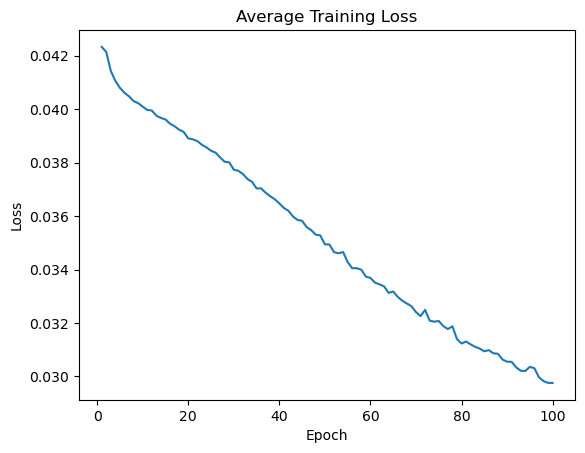

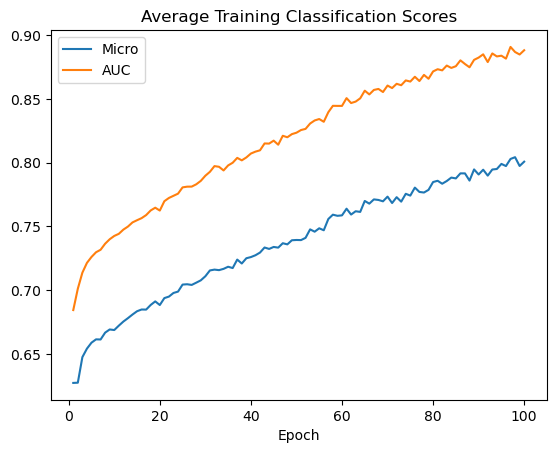

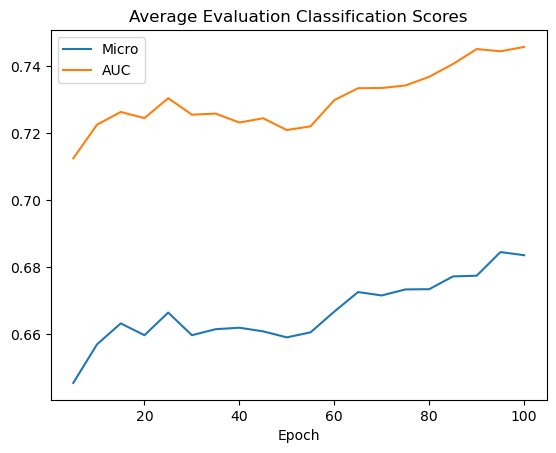

In [7]:
df = load_results("training\\kbi_sex_assigned_at_birth.csv")
df = avg_folds(df)
plot_traj(df, ["avg_loss"], ["Loss"], "Average Training Loss")
plot_traj(df, ["avg_train_micro", "avg_train_auc"],
          ["Micro", "AUC"], "Average Training Classification Scores")

test_df = filter_test_scores(df)
plot_traj(test_df, ["avg_test_micro", "avg_test_auc"],
          ["Micro", "AUC"], "Average Evaluation Classification Scores")